In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [22]:
#import files
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
#merge two files into one dataframe
data = pd.merge(left=ratings,right=movies,on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [34]:
data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [37]:
average_rating_movies = data.groupby('title')['rating'].mean().sort_values(ascending=False)

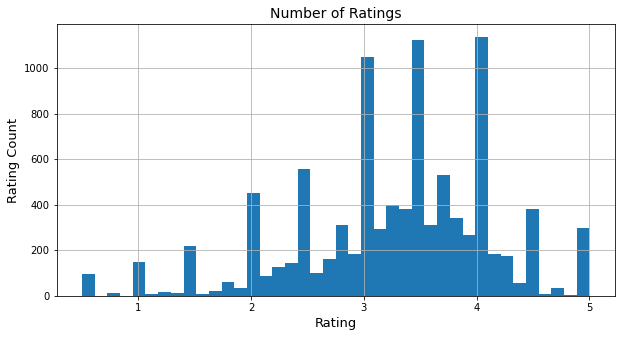

In [42]:
#plotting Ratings of movies
plt.figure(figsize =(10, 5))
average_rating_movies.hist(bins=40)
plt.title("Number of Ratings",fontsize=14)
plt.ylabel('Rating Count',fontsize=13)
plt.xlabel('Rating',fontsize=13)
plt.show()

Maximum movies have average rating in the range 3 to 4. The movies which have average = 5.0 may be the ones which may have been watched once or twice.

In [45]:
# creating pivot table to create item by item collaborative filtering

movie_rating_pivot = pd.pivot_table(index='userId',columns='title',values='rating',data=data)

In [52]:
# use a random example (Jurassic Park) to startoff the model
# assigning ratings of movie 'Jurassic Park (1993)' to a new variable from movie_rating_pivot
jurassic_park = movie_rating_pivot['Jurassic Park (1993)'].head(10)
jurassic_park.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     4.0
9     NaN
10    NaN
Name: Jurassic Park (1993), dtype: float64

In [57]:
# grouping the movie_rating based on count on userId and mean on rating
r1 = data.groupby('title')[['userId','rating']].agg({'userId':'count','rating':'mean'}).round(2).sort_values(by='userId',ascending=False)
r1

,userId,rating
title,,
Forrest Gump (1994),329,4.16
"Shawshank Redemption, The (1994)",317,4.43
Pulp Fiction (1994),307,4.20
"Silence of the Lambs, The (1991)",279,4.16
"Matrix, The (1999)",278,4.19
...,...,...
King Solomon's Mines (1950),1,3.00
King Solomon's Mines (1937),1,2.50
King Ralph (1991),1,1.50
